# Unsupervised Learning

Objective : The notebook will explore unsupervised algorithms to explore and find structure in the gene expression data.

## Library Imports

In [1]:
# Import libraries
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import umap

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from imblearn.over_sampling import SMOTE
from scipy.cluster.hierarchy import ward, dendrogram, fcluster, linkage
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.manifold import TSNE
from sklearn.decomposition import NMF

RANDOM_SEED = 42

## Import Data
Importing data with 10 principal components, this number of principal components was found to be the highest performing data set on supervised learning tasks.  Clustering of the 10 PCA data set is done with both the 10 PCA data set and using the SMOTE technique to adjust for class imbalance. 

In [2]:
# Import PCA data
train_file = "data/X_train_10_PCs.csv"
test_file = "data/X_test_10_PCs.csv"
ytrain_file = 'data/y_train.csv'
ytest_file = 'data/y_test.csv'

PCA_X_train = pd.read_csv(train_file)
PCA_X_train.rename(columns={"Unnamed: 0": "CellID"}, inplace = True)
PCA_X_train.set_index('CellID', inplace = True)

PCA_X_test = pd.read_csv(test_file)
PCA_X_test.rename(columns={"Unnamed: 0": "CellID"}, inplace = True)
PCA_X_test.set_index('CellID', inplace = True)

y_train = pd.read_csv(ytrain_file)
y_train.set_index('CellID', inplace = True)

y_test = pd.read_csv(ytest_file)
y_test.set_index('CellID', inplace = True)

#rebalance 
sm = SMOTE(random_state=RANDOM_SEED)
X_train_res, y_train_res = sm.fit_resample(PCA_X_train, y_train)

# Clustering
## Agglomerative Clustering

In [3]:
# Create agglomerative model 
# Using the ward function to create the model
agglo_model = ward(PCA_X_train)

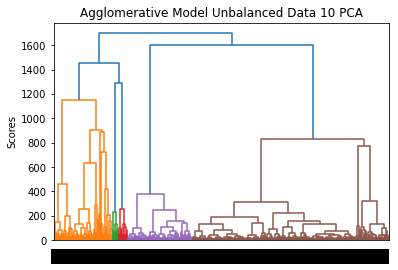

In [4]:
#plot unbalanced dendrogram
plt.figure()
dendrogram(agglo_model)
plt.title('Agglomerative Model Unbalanced Data 10 PCA')
plt.ylabel('Scores')
plt.show()

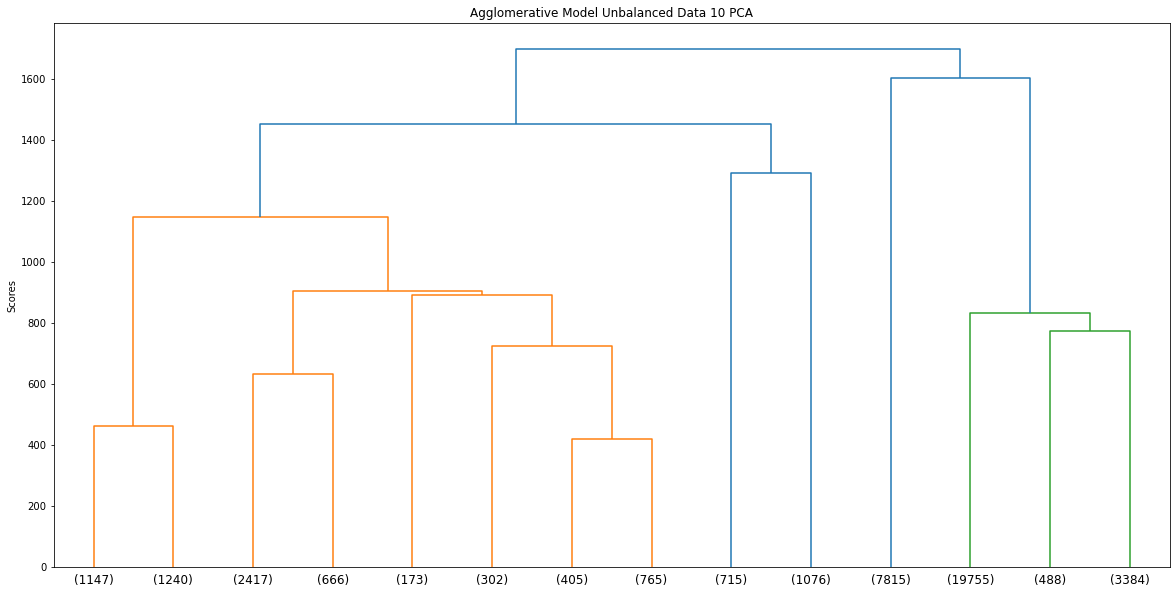

In [5]:
#plot unbalanced dendrogram
# Sources: https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html
plt.figure(figsize = (20,10))
dendrogram(agglo_model, p = 14, truncate_mode = 'lastp', show_leaf_counts = True)
plt.title('Agglomerative Model Unbalanced Data 10 PCA')
plt.ylabel('Scores')
plt.show()

In [6]:
# Create Labels and Score Cluster Model   
#create labels from the aggolmerative clustering to test 
k=14  # number of clusters
agglo_labels  = fcluster(agglo_model, k, criterion='maxclust')

agglo_adjrand = metrics.adjusted_rand_score(y_train.type.values, agglo_labels)
agglo_homogeneity = metrics.homogeneity_score(y_train.type.values, agglo_labels)
agglo_vmeasure = metrics.v_measure_score(y_train.type.values, agglo_labels)
agglo_complete = metrics.completeness_score(y_train.type.values, agglo_labels) 
score = pd.DataFrame({'Agglomerative 10PCs' : [agglo_adjrand, agglo_homogeneity, agglo_vmeasure, agglo_complete]},
    index=['Adj_Rand', 'Homogeneity', 'Vmeasure', 'Completeness'])

In [7]:
# How did the  agglomerative model do?
score.round(3)

,Agglomerative 10PCs
Adj_Rand,0.552
Homogeneity,0.687
Vmeasure,0.739
Completeness,0.800


In [8]:
# repeat process for 100 component PCA
 # Import PCA data
train100_file = "data/X_train_100_PCs.csv"
test100_file = "data/X_test_100_PCs.csv"

PCA_X_train100 = pd.read_csv(train100_file)
PCA_X_train100.rename(columns={"Unnamed: 0": "CellID"}, inplace = True)
PCA_X_train100.set_index('CellID', inplace = True)

PCA_X_test100 = pd.read_csv(test100_file)
PCA_X_test100.rename(columns={"Unnamed: 0": "CellID"}, inplace = True)
PCA_X_test100.set_index('CellID', inplace = True)

agglo_model100 = ward(PCA_X_train100)
agglo_labels100  = fcluster(agglo_model100, k, criterion='maxclust')
agglo_adjrand100 = metrics.adjusted_rand_score(y_train.type.values, agglo_labels100)
agglo_homogeneity100 = metrics.homogeneity_score(y_train.type.values, agglo_labels100)
agglo_vmeasure100 = metrics.v_measure_score(y_train.type.values, agglo_labels100)
agglo_complete100 = metrics.completeness_score(y_train.type.values, agglo_labels100)
score['Agglomerative 100PCs'] = [agglo_adjrand100, agglo_homogeneity100, agglo_vmeasure100, agglo_complete100  ]



## K-Means Clustering

In [9]:
kmeans = KMeans(n_clusters=14, random_state=42).fit(PCA_X_train)
kmeans100 = KMeans(n_clusters=14, random_state=42).fit(PCA_X_train100)

In [10]:
# Score K-means
kmean_adjrand = metrics.adjusted_rand_score(y_train.type.values, kmeans.labels_)
kmean_homogeneity = metrics.homogeneity_score(y_train.type.values, kmeans.labels_)
kmean_vmeasure = metrics.v_measure_score(y_train.type.values, kmeans.labels_)
kmean_complete = metrics.completeness_score(y_train.type.values, kmeans.labels_)
score['k-means PC10'] = [kmean_adjrand, kmean_homogeneity, kmean_vmeasure, kmean_complete]

kmean_adjrand100 = metrics.adjusted_rand_score(y_train.type.values, kmeans100.labels_)
kmean_homogeneity100 = metrics.homogeneity_score(y_train.type.values, kmeans100.labels_)
kmean_vmeasure100 = metrics.v_measure_score(y_train.type.values, kmeans100.labels_)
kmean_complete100 = metrics.completeness_score(y_train.type.values, kmeans100.labels_)
score['k-means PC100'] = [kmean_adjrand100, kmean_homogeneity100, kmean_vmeasure100, kmean_complete100]

In [11]:
# View results
score.round(3)

,Agglomerative 10PCs,Agglomerative 100PCs,k-means PC10,k-means PC100
Adj_Rand,0.552,0.537,0.645,0.615
Homogeneity,0.687,0.680,0.724,0.755
Vmeasure,0.739,0.731,0.726,0.736
Completeness,0.800,0.791,0.728,0.717


## DBSCAN
DBSCAN with defaults results in very poor model.  
Trying method from lecture notes to find best parameters.

        - sample ~10% of dataframe
        - compute K nearest neighbors distance for small K (eg 1)
        - set eps to multiple of median of distance, ie 3x
        - start with min samples = 5

In [12]:
# Step 1 and 2
from sklearn.neighbors import KNeighborsClassifier
kdistmodel = KNeighborsClassifier(n_neighbors=1)
kdistmodel.fit(PCA_X_train.sample(4000, random_state = RANDOM_SEED), y_train.sample(4000, random_state = RANDOM_SEED).values.ravel())
dist = kdistmodel.kneighbors()
starting_median =  np.median(dist[0])
print("median we need to start with:" , starting_median)

median we need to start with: 1.4500426830343105


In [13]:
# create function to Compute DBSCAN metrics with different parameters

def db_scan_metrics(n_eps, n_min_samples):
    db = DBSCAN(eps=n_eps, min_samples=n_min_samples).fit(PCA_X_train)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_

    # Number of clusters in labels, ignoring noise if present.
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    
    # return results
    return [n_clusters_, n_noise_,metrics.homogeneity_score(y_train.type.values, labels),
      metrics.completeness_score(y_train.type.values, labels),
      metrics.v_measure_score(y_train.type.values, labels),
      metrics.adjusted_rand_score(y_train.type.values, labels),
      metrics.adjusted_mutual_info_score(y_train.type.values, labels)]


In [14]:
dbscan_results = pd.DataFrame(index = ['clusters', 'n_noise', 'homogeneity', 'completeness', 'vmeasure',
    'adj_rand_score', 'adj_mutual_info'], columns = [[5,5,5,6,6,6,7,7,7], [3,6,9,3,6,9,3,6,9]])
dbscan_results.columns.names = ['min_samples', 'eps']
for param in dbscan_results.columns:
    vect = db_scan_metrics(param[1],param[0])
    dbscan_results[(param[0], param[1])] = vect
    

In [15]:
dbscan_results.round(3)

min_samples             5                          6                   \
eps                     3        6       9         3        6       9   
clusters           31.000    2.000   1.000    22.000    3.000   1.000   
n_noise          2826.000  118.000  24.000  3035.000  127.000  25.000   
homogeneity         0.165    0.015   0.001     0.162    0.015   0.001   
completeness        0.650    0.668   0.243     0.649    0.648   0.246   
vmeasure            0.263    0.029   0.001     0.259    0.029   0.001   
adj_rand_score      0.078    0.005   0.000     0.079    0.005   0.000   
adj_mutual_info     0.261    0.029   0.001     0.257    0.029   0.001   

min_samples             7                   
eps                     3        6       9  
clusters           17.000    3.000   2.000  
n_noise          3247.000  138.000  26.000  
homogeneity         0.159    0.015   0.013  
completeness        0.648    0.640   0.848  
vmeasure            0.255    0.029   0.026  
adj_rand_score      0.079    0.005   0.004  
adj_mutual_info     0.254    0.029   0.026

In [16]:
# add best result to score table of all cluster algos
score['DBSCAN'] = [dbscan_results[(7,3)].adj_rand_score, dbscan_results[(7,3)].homogeneity, 
    dbscan_results[(7,3)].vmeasure, dbscan_results[(7,3)].completeness]

score.round(3)

,Agglomerative 10PCs,Agglomerative 100PCs,k-means PC10,k-means PC100,DBSCAN
Adj_Rand,0.552,0.537,0.645,0.615,0.079
Homogeneity,0.687,0.680,0.724,0.755,0.159
Vmeasure,0.739,0.731,0.726,0.736,0.255
Completeness,0.800,0.791,0.728,0.717,0.648


# Visualize Clusters
## Use TSNE and UMAP 

In [17]:
tsne = TSNE(random_state = RANDOM_SEED)
data_tsne = tsne.fit_transform(PCA_X_train)
tsne_df = pd.DataFrame(data_tsne, columns = ['feature0', 'feature1'])
tsne_df['agglolabel'] = agglo_labels
tsne_df['k_label'] = kmeans.labels_
tsne_df['truthlabel'] = y_train.type.values

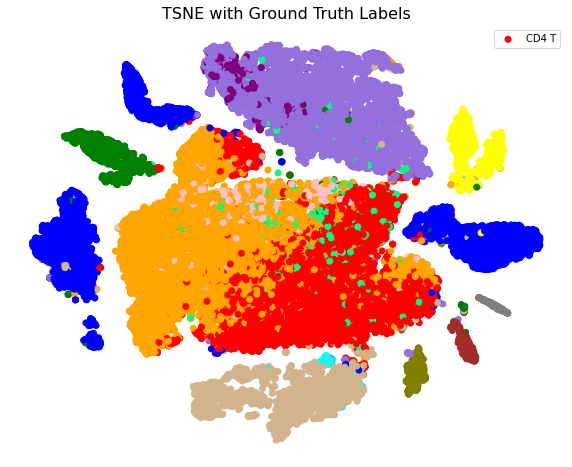

In [18]:
#Chart Cluster with ground truth using TSNE
colors = {'CD4 T':'red', 'Endothelial':'yellow', 'Tumor':'blue', 'Myeloid':'mediumpurple', 'CD8 T': 'orange', 
    'B cell': 'tan','Stromal':'green', 'RBC': 'springgreen', 'DC':'purple', 'Alveolar':'brown', 'NK':'pink',
     'Epithelial':'gray', 'Mast':'olive', 'pDC':'cyan'}
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(tsne_df.feature0, tsne_df.feature1, c= tsne_df.truthlabel.map(colors))
plt.title('TSNE with Ground Truth Labels',fontsize=16, loc = 'center', )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.legend(tsne_df.truthlabel)
plt.show()




No handles with labels found to put in legend.


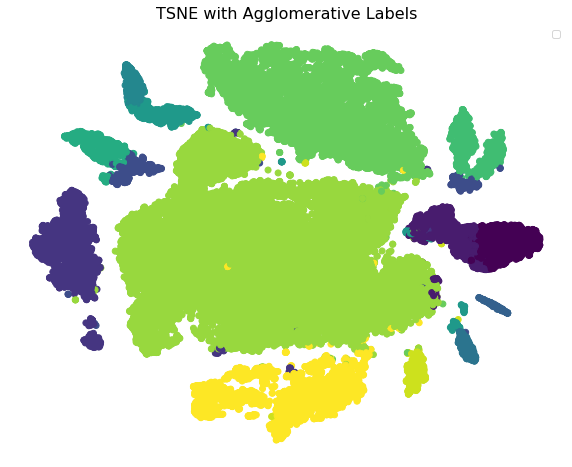

In [19]:
#Chart Cluster with agglomerative using TSNE

fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(tsne_df.feature0, tsne_df.feature1, c= tsne_df.agglolabel)
plt.title('TSNE with Agglomerative Labels',fontsize=16, loc = 'center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.legend()
plt.show()

No handles with labels found to put in legend.


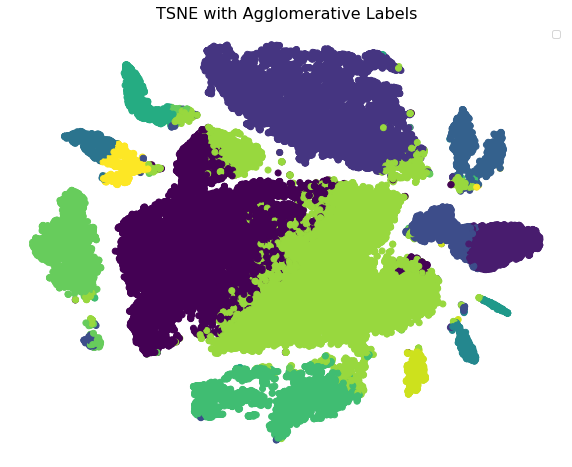

In [20]:
#Chart Cluster with K-means labels using TSNE

fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(tsne_df.feature0, tsne_df.feature1, c= tsne_df.k_label)
plt.title('TSNE with Agglomerative Labels',fontsize=16, loc = 'center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.legend()
plt.show()

## UMAP Visualization

In [21]:
reducer = umap.UMAP(n_neighbors= 25)
embedding = reducer.fit_transform(PCA_X_train)
umap_df = pd.DataFrame(embedding, columns = ['feature0', 'feature1'])
umap_df['truthlabel'] = y_train.type.values
umap_df['agglolabel'] = agglo_labels
umap_df['k_label'] = kmeans.labels_

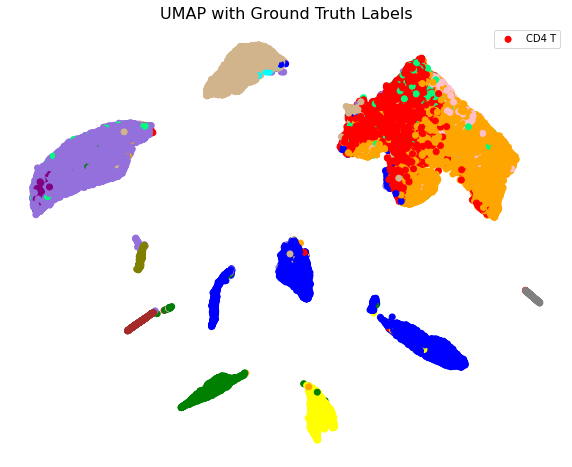

In [22]:
#Chart Cluster with ground truth using UMAP
colors = {'CD4 T':'red', 'Endothelial':'yellow', 'Tumor':'blue', 'Myeloid':'mediumpurple', 'CD8 T': 'orange', 
    'B cell': 'tan','Stromal':'green', 'RBC': 'springgreen', 'DC':'purple', 'Alveolar':'brown', 'NK':'pink',
     'Epithelial':'gray', 'Mast':'olive', 'pDC':'cyan'}
fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(umap_df.feature0, umap_df.feature1, c= umap_df.truthlabel.map(colors))
plt.title('UMAP with Ground Truth Labels',fontsize=16, loc = 'center', )

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.legend(tsne_df.truthlabel)
plt.show()

No handles with labels found to put in legend.


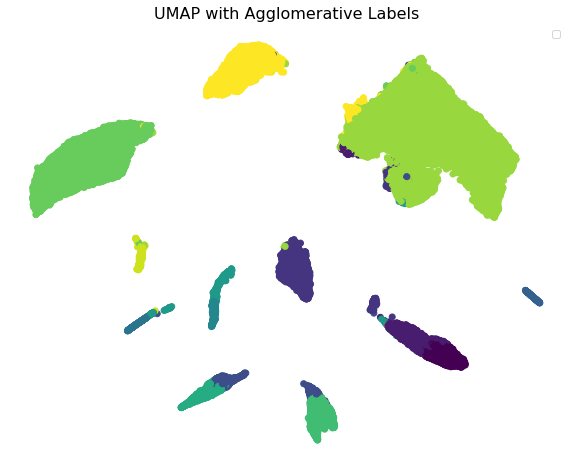

In [23]:
#Chart Cluster with agglomerative using UMAP

fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(umap_df.feature0, umap_df.feature1, c= umap_df.agglolabel)
plt.title('UMAP with Agglomerative Labels',fontsize=16, loc = 'center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.legend()
plt.show()

No handles with labels found to put in legend.


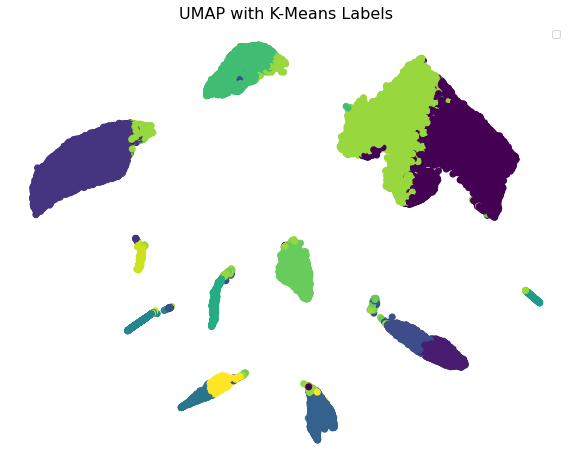

In [24]:
#Chart Cluster with K-means using UMAP

fig, ax = plt.subplots(figsize = (10,8))
ax.scatter(umap_df.feature0, umap_df.feature1, c= umap_df.k_label)
plt.title('UMAP with K-Means Labels',fontsize=16, loc = 'center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.axes.get_xaxis().set_visible(False)
plt.legend()
plt.show()

# Explore Non-Negative Matrix Factorization (NMF)
Find latent structure in gene expression data.  Generalize the idea in which NMF which takes a document-matrix and returns a document-topic matrix and a topic-term matrix.  The generalization is to take a cell-gene expression matrix and return a cell-topic matrix and a topic-gene expression matrix.  Here the idea is that the concept "topic" generalizes to clusters of gene expression which may point to cell types.  To state differently the latent structure found - the topics - represent common gene expression patterns that can identify similar cells.  Therefore the document-topic matrix, W,  is a cell-cell type matrix.  Similarily the topic-term matrix represents a cell type - gene expression matrix.  This cell type - gene expression matrix is interesting (possibly) because it may tell us what genes are most expressed in a type of cell.   

In [28]:
# Load raw cell data
X_train_csv = "data/X_train.csv"
X_test_csv = "data/X_test.csv"
X_train_df = pd.read_csv(X_train_csv)
X_train_df.set_index('CellID', inplace = True)


In [29]:
# Fit the model
nmf_model = NMF(n_components=14, init='nndsvd', max_iter = 1000, random_state=42)
W = nmf_model.fit_transform(X_train_df)
H = nmf_model.components_

In [30]:
# Create Labels and score model
nmf_labels = np.argmax(W, axis=1)
nmf_adjrand = metrics.adjusted_rand_score(y_train.type.values, nmf_labels)
nmf_homogeneity = metrics.homogeneity_score(y_train.type.values, nmf_labels)
nmf_vmeasure = metrics.v_measure_score(y_train.type.values, nmf_labels)
nmf_complete = metrics.completeness_score(y_train.type.values, nmf_labels)
score['NMF'] = [nmf_adjrand, nmf_homogeneity, nmf_vmeasure, nmf_complete]

In [31]:
# Normalize the data with log method
norm_X_train = np.log(1+X_train_df) 

In [42]:
# Fit the normalized model
norm_nmf_model = NMF(n_components=14, init='nndsvd', max_iter = 2000, random_state=42)
Wnorm = norm_nmf_model.fit_transform(norm_X_train)
Hnorm = norm_nmf_model.components_

In [43]:
#Score the normalized model
nmf_labels_norm = np.argmax(Wnorm, axis=1)
nmf_adjrand_n = metrics.adjusted_rand_score(y_train.type.values, nmf_labels_norm)
nmf_homogeneity_n = metrics.homogeneity_score(y_train.type.values, nmf_labels_norm)
nmf_vmeasure_n = metrics.v_measure_score(y_train.type.values, nmf_labels_norm)
nmf_complete_n = metrics.completeness_score(y_train.type.values, nmf_labels_norm)
score['NMF Norm'] = [nmf_adjrand_n, nmf_homogeneity_n, nmf_vmeasure_n, nmf_complete_n]

In [44]:
# Show the results matrix with NMF added in
score.round(3)

,Agglomerative 10PCs,Agglomerative 100PCs,k-means PC10,k-means PC100,DBSCAN,NMF,NMF Norm
Adj_Rand,0.552,0.537,0.645,0.615,0.079,0.348,0.372
Homogeneity,0.687,0.680,0.724,0.755,0.159,0.568,0.605
Vmeasure,0.739,0.731,0.726,0.736,0.255,0.522,0.539
Completeness,0.800,0.791,0.728,0.717,0.648,0.483,0.486


In [45]:
# generate top expressed genes per cell type / cluster (topic) using log normed data
# code amended from class notebook
n_types = 14
n_genes = 10

for topic_index in range(0, n_types):
    top_indices = np.argsort(Hnorm[topic_index, :])[::-1]
    top_terms = []
    for term_index in top_indices[0:n_genes]:
        top_terms.append(X_train_df.columns[term_index])
    print("cell type cluster ", topic_index, top_terms)

cell type cluster  0 ['MALAT1', 'MT-CO3', 'MT-CO1', 'MT-CO2', 'MT-CYB', 'MT-ND4', 'MT-ND2', 'MT-ATP6', 'B2M', 'MT-ND1']
cell type cluster  1 ['C1QB', 'APOC1', 'C1QA', 'HLA-DRA', 'APOE', 'CD74', 'FTL', 'CTSD', 'HLA-DPB1', 'C1QC']
cell type cluster  2 ['RPS6', 'RPS18', 'GAPDH', 'RPS12', 'PTMA', 'RPL37', 'TMSB10', 'RPS19', 'RPL35A', 'RPL13A']
cell type cluster  3 ['EEF1A1', 'PFN1', 'ACTB', 'MT-CO1', 'RPL3', 'GAPDH', 'RPS2', 'ACTG1', 'CFL1', 'HNRNPA1']
cell type cluster  4 ['SPP1', 'S100A11', 'CSTB', 'S100A10', 'GSTP1', 'TXN', 'TMSB10', 'FGB', 'FTH1', 'FTL']
cell type cluster  5 ['MT-CO3', 'MT-ATP6', 'MT-ND2', 'MT-CYB', 'MT-CO2', 'MT-ND4', 'MT-CO1', 'MT-ND3', 'MT-ND1', 'MALAT1']
cell type cluster  6 ['IFITM3', 'MT2A', 'IGFBP7', 'ITM2B', 'B2M', 'ZFP36', 'SPARC', 'TIMP1', 'HLA-B', 'IFI27']
cell type cluster  7 ['IGKC', 'SSR4', 'JCHAIN', 'IGHG1', 'IGHG3', 'MZB1', 'IGHA1', 'IGLC2', 'XBP1', 'HERPUD1']
cell type cluster  8 ['HSP90AA1', 'ISG15', 'HSPA1A', 'MALAT1', 'GAPDH', 'B2M', 'LY6E', 'HLA-A'

# Task Based Evaluation of Unsupervised Models
Evaluate the performance improvement of supervised models with the inclusion of unsupervised model generated labels.  If a notable performace is observed, the unsupervised model is adding an additional signal the supervised model can capitalize on.